#      What is a GAN?

GAN stands for Generative Adveserial network, which is type of deep learning which consist 2 models,
  1. Generator 
  2. Discriminator
 Generator takes random noise vector. and generate new samples ( we can give an example of image), while discriminator evaluate wether given image is real or fake (generated by generator) 

#      How does a GAN work?

To train GAN, you can use the following process
1.The generator takes in a random noise vector and generates a new data sample.
2.The discriminator evaluates the generated data sample and provides feedback to the generator.
3.The generator updates its parameters to produce better data samples that can fool the discriminator.
4. The discriminator updates its parameters to better distinguish between real and fake data samples.
5. Steps 1-4 are repeated for a number of iterations until the generator produces data samples that are indistinguishable from real data samples.

#       Mathematical formulas

1.The generator's loss function is given by:
L_G = -E[log(D(G(z)))]
where z is a noise vector that is fed into the generator, G(z) is the output of the generator, and D(.) is the discriminator. The generator tries to minimize this loss function


2. The discriminator's loss function is given by:
L_D = -E[log(D(x))] - E[log(1 - D(G(z)))]
where x is a real image from the dataset, G(z) is a fake image generated by the generator, and D(.) is the discriminator. The discriminator tries to maximize this loss function

3.The overall formula for GAN can be expressed as:

min_G max_D V(D, G) = E_x[log(D(x))] + E_z[log(1 - D(G(z)))]

where:

.G is the generator function that takes a random noise vector z as input and outputs a generated sample G(z)
.D is the discriminator function that takes a sample x as input and outputs a scalar value D(x) representing the probability that x comes from the real data distribution
.E_x denotes the expectation over the real data distribution
.E_z denotes the expectation over the random noise distribution
The objective of GAN is to find the optimal G and D that jointly minimize V(D, G). 



#     Application of GAN


1. Image generation : image resembles like original
2. video synthetis :such as sports highlights, cartoons, or music videos
3. Data augmentation: GANs can be used to augment a given dataset with new data samples that are similar but not identical to the original data samples.
4.Text generation: GANs can be used to generate new text that resembles a given corpus of text, such as news articles, tweets, or stories. 

#      IMPLEMENTATION STEP BY STEP,
      in this implementation pytorch have used

In [75]:
#step 1 Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [76]:
# step 2 load dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=256, shuffle=True)


In [77]:
# step 3, define Generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 28*28)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)), 0.2)
        x = F.leaky_relu(self.bn2(self.fc2(x)), 0.2)
        x = torch.tanh(self.fc3(x))
        return x.view(-1, 1, 28, 28)

# step 4 define Discriminator model
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.conv1 = nn.Conv2d(1, 64, 3, stride=2, padding=1)
#         self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
#         self.bn2 = nn.BatchNorm2d(128)
#         self.fc1 = nn.Linear(128*7*7, 1)

#     def forward(self, x):
#         x = F.leaky_relu(self.conv1(x), 0.2)
#         x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2)
#         x = x.view(-1, 128*7*7)
#         x = torch.sigmoid(self.fc1(x))
#         return x


In [78]:
# Define a new Discriminator model with more layers
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128*4*4, 1)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.conv1(x)), 0.2)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2)
        x = x.view(-1, 128*4*4)
        x = torch.sigmoid(self.fc1(x))
        return x



In [79]:
#step 5 models, loss function, optimizers
# 1.Initialize the models
generator = Generator()
discriminator = Discriminator()

# 2.Define the loss function
criterion = nn.BCELoss()

# 3.Define the optimizers
generator_optimizer = optim.Adam(generator.parameters(), lr=1e-2, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=1e-2, betas=(0.5, 0.999))


In [80]:
!pip install opencv-python
import cv2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch [1/300], Batch [1/235], Discriminator Loss: 1.2043, Generator Loss: 6.7557, Discriminator Accuracy: 100.00%
Epoch [1/300], Batch [101/235], Discriminator Loss: 0.0460, Generator Loss: 8.0021, Discriminator Accuracy: 99.02%
Epoch [1/300], Batch [201/235], Discriminator Loss: 0.7664, Generator Loss: 2.8573, Discriminator Accuracy: 91.02%
Epoch [2/300], Batch [1/235], Discriminator Loss: 0.8332, Generator Loss: 4.5175, Discriminator Accuracy: 82.03%
Epoch [2/300], Batch [101/235], Discriminator Loss: 0.7156, Generator Loss: 2.9525, Discriminator Accuracy: 87.70%
Epoch [2/300], Batch [201/235], Discriminator Loss: 0.8461, Generator Loss: 2.5455, Discriminator Accuracy: 90.62%
Epoch [3/300], Batch [1/235], Discriminator Loss: 0.9964, Generator Loss: 0.9467, Discriminator Accuracy: 86.52%
Epoch [3/300], Batch [101/235], Discriminator Loss: 1.4730, Generator Loss: 0.7227, Discriminator Accuracy: 76.17%
Epoch [3/300], Batch [201/235], Discriminator Loss: 0.5824, Generator Loss: 3.8417, D

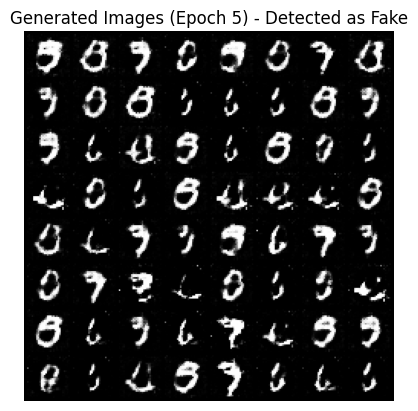

Epoch [6/300], Batch [1/235], Discriminator Loss: 0.4600, Generator Loss: 0.3663, Discriminator Accuracy: 54.30%
Epoch [6/300], Batch [101/235], Discriminator Loss: 0.2101, Generator Loss: 5.1643, Discriminator Accuracy: 98.24%
Epoch [6/300], Batch [201/235], Discriminator Loss: 0.8332, Generator Loss: 11.4786, Discriminator Accuracy: 62.89%
Epoch [7/300], Batch [1/235], Discriminator Loss: 0.3102, Generator Loss: 5.2557, Discriminator Accuracy: 99.22%
Epoch [7/300], Batch [101/235], Discriminator Loss: 0.1040, Generator Loss: 3.5722, Discriminator Accuracy: 99.80%
Epoch [7/300], Batch [201/235], Discriminator Loss: 0.0063, Generator Loss: 6.4547, Discriminator Accuracy: 100.00%
Epoch [8/300], Batch [1/235], Discriminator Loss: 0.0063, Generator Loss: 5.9458, Discriminator Accuracy: 100.00%
Epoch [8/300], Batch [101/235], Discriminator Loss: 0.0008, Generator Loss: 8.3753, Discriminator Accuracy: 100.00%
Epoch [8/300], Batch [201/235], Discriminator Loss: 0.1138, Generator Loss: 10.404

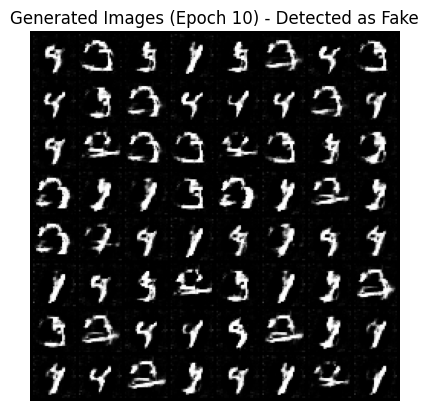

Epoch [11/300], Batch [1/235], Discriminator Loss: 5.0771, Generator Loss: 1.1789, Discriminator Accuracy: 82.42%
Epoch [11/300], Batch [101/235], Discriminator Loss: 0.1130, Generator Loss: 4.7631, Discriminator Accuracy: 98.63%
Epoch [11/300], Batch [201/235], Discriminator Loss: 0.4822, Generator Loss: 9.0526, Discriminator Accuracy: 94.73%
Epoch [12/300], Batch [1/235], Discriminator Loss: 0.3419, Generator Loss: 3.1856, Discriminator Accuracy: 99.41%
Epoch [12/300], Batch [101/235], Discriminator Loss: 0.3369, Generator Loss: 4.5712, Discriminator Accuracy: 96.29%
Epoch [12/300], Batch [201/235], Discriminator Loss: 0.1648, Generator Loss: 3.5472, Discriminator Accuracy: 99.41%
Epoch [13/300], Batch [1/235], Discriminator Loss: 0.0524, Generator Loss: 3.7376, Discriminator Accuracy: 99.80%
Epoch [13/300], Batch [101/235], Discriminator Loss: 0.2376, Generator Loss: 3.3008, Discriminator Accuracy: 97.85%
Epoch [13/300], Batch [201/235], Discriminator Loss: 0.0744, Generator Loss: 4

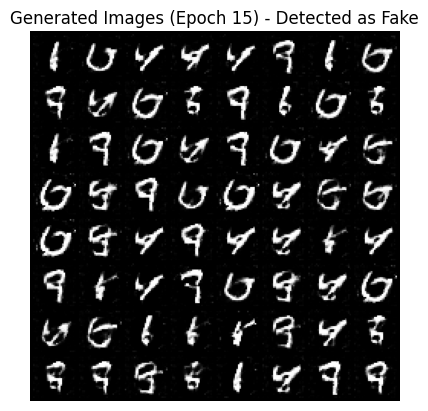

Epoch [16/300], Batch [1/235], Discriminator Loss: 0.0283, Generator Loss: 6.8500, Discriminator Accuracy: 99.22%
Epoch [16/300], Batch [101/235], Discriminator Loss: 0.1103, Generator Loss: 4.2439, Discriminator Accuracy: 99.80%
Epoch [16/300], Batch [201/235], Discriminator Loss: 0.0855, Generator Loss: 5.1520, Discriminator Accuracy: 99.22%
Epoch [17/300], Batch [1/235], Discriminator Loss: 0.4005, Generator Loss: 4.1760, Discriminator Accuracy: 100.00%
Epoch [17/300], Batch [101/235], Discriminator Loss: 0.3124, Generator Loss: 3.3864, Discriminator Accuracy: 99.02%
Epoch [17/300], Batch [201/235], Discriminator Loss: 0.0816, Generator Loss: 4.8154, Discriminator Accuracy: 99.61%
Epoch [18/300], Batch [1/235], Discriminator Loss: 0.1051, Generator Loss: 4.9118, Discriminator Accuracy: 100.00%
Epoch [18/300], Batch [101/235], Discriminator Loss: 0.1220, Generator Loss: 4.7966, Discriminator Accuracy: 99.80%
Epoch [18/300], Batch [201/235], Discriminator Loss: 0.0632, Generator Loss:

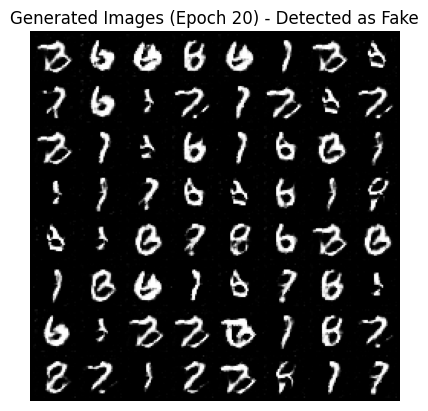

Epoch [21/300], Batch [1/235], Discriminator Loss: 0.0542, Generator Loss: 3.9760, Discriminator Accuracy: 100.00%
Epoch [21/300], Batch [101/235], Discriminator Loss: 0.0513, Generator Loss: 5.4714, Discriminator Accuracy: 99.80%
Epoch [21/300], Batch [201/235], Discriminator Loss: 0.1590, Generator Loss: 6.5696, Discriminator Accuracy: 98.44%
Epoch [22/300], Batch [1/235], Discriminator Loss: 0.0127, Generator Loss: 7.0970, Discriminator Accuracy: 100.00%
Epoch [22/300], Batch [101/235], Discriminator Loss: 0.0003, Generator Loss: 12.9748, Discriminator Accuracy: 100.00%
Epoch [22/300], Batch [201/235], Discriminator Loss: 0.0001, Generator Loss: 48.6003, Discriminator Accuracy: 100.00%
Epoch [23/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 48.2391, Discriminator Accuracy: 100.00%
Epoch [23/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 47.4621, Discriminator Accuracy: 100.00%
Epoch [23/300], Batch [201/235], Discriminator Loss: 0.0000, Generat

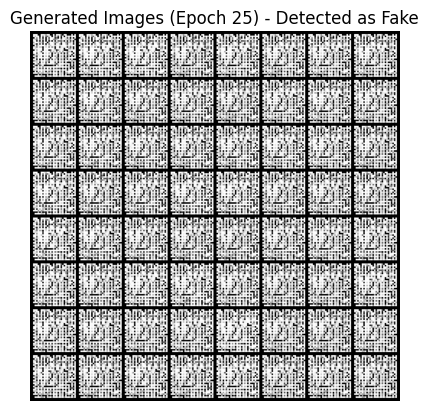

Epoch [26/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 47.0906, Discriminator Accuracy: 100.00%
Epoch [26/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 47.0598, Discriminator Accuracy: 100.00%
Epoch [26/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 47.0234, Discriminator Accuracy: 100.00%
Epoch [27/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.9649, Discriminator Accuracy: 100.00%
Epoch [27/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.9867, Discriminator Accuracy: 100.00%
Epoch [27/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 46.8876, Discriminator Accuracy: 100.00%
Epoch [28/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.9002, Discriminator Accuracy: 100.00%
Epoch [28/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.8561, Discriminator Accuracy: 100.00%
Epoch [28/300], Batch [201/235], Discriminator Loss: 0.0000, G

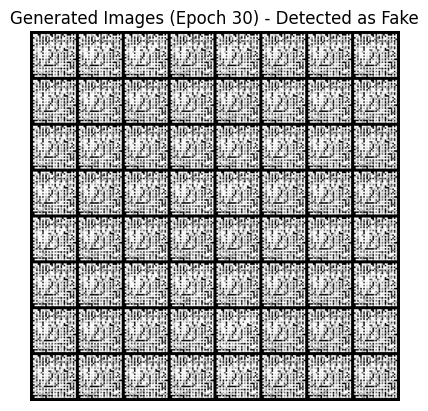

Epoch [31/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.6787, Discriminator Accuracy: 100.00%
Epoch [31/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.6667, Discriminator Accuracy: 100.00%
Epoch [31/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 46.6397, Discriminator Accuracy: 100.00%
Epoch [32/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.6110, Discriminator Accuracy: 100.00%
Epoch [32/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.6149, Discriminator Accuracy: 100.00%
Epoch [32/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 46.6050, Discriminator Accuracy: 100.00%
Epoch [33/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.6031, Discriminator Accuracy: 100.00%
Epoch [33/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.5559, Discriminator Accuracy: 100.00%
Epoch [33/300], Batch [201/235], Discriminator Loss: 0.0000, G

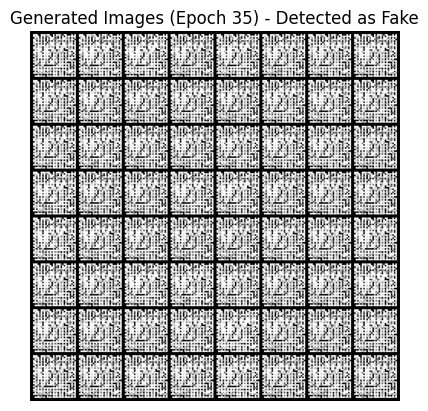

Epoch [36/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.4049, Discriminator Accuracy: 100.00%
Epoch [36/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.3854, Discriminator Accuracy: 100.00%
Epoch [36/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 46.3853, Discriminator Accuracy: 100.00%
Epoch [37/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.4063, Discriminator Accuracy: 100.00%
Epoch [37/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.3617, Discriminator Accuracy: 100.00%
Epoch [37/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 46.3370, Discriminator Accuracy: 100.00%
Epoch [38/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.3122, Discriminator Accuracy: 100.00%
Epoch [38/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.3546, Discriminator Accuracy: 100.00%
Epoch [38/300], Batch [201/235], Discriminator Loss: 0.0000, G

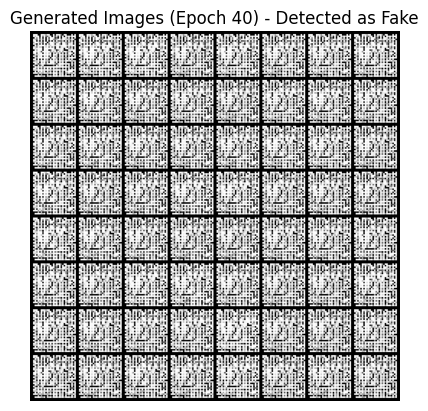

Epoch [41/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.2068, Discriminator Accuracy: 100.00%
Epoch [41/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.2022, Discriminator Accuracy: 100.00%
Epoch [41/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 46.1724, Discriminator Accuracy: 100.00%
Epoch [42/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.2001, Discriminator Accuracy: 100.00%
Epoch [42/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.1503, Discriminator Accuracy: 100.00%
Epoch [42/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 46.1202, Discriminator Accuracy: 100.00%
Epoch [43/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 46.1239, Discriminator Accuracy: 100.00%
Epoch [43/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 46.1425, Discriminator Accuracy: 100.00%
Epoch [43/300], Batch [201/235], Discriminator Loss: 0.0000, G

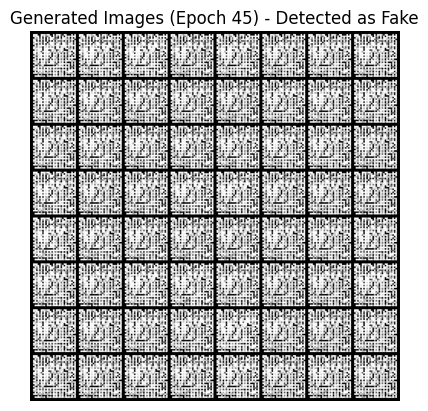

Epoch [46/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 45.9892, Discriminator Accuracy: 100.00%
Epoch [46/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 45.9439, Discriminator Accuracy: 100.00%
Epoch [46/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 45.9744, Discriminator Accuracy: 100.00%
Epoch [47/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 45.9560, Discriminator Accuracy: 100.00%
Epoch [47/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 45.9441, Discriminator Accuracy: 100.00%
Epoch [47/300], Batch [201/235], Discriminator Loss: 0.0000, Generator Loss: 45.9090, Discriminator Accuracy: 100.00%
Epoch [48/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 45.9009, Discriminator Accuracy: 100.00%
Epoch [48/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 45.9062, Discriminator Accuracy: 100.00%
Epoch [48/300], Batch [201/235], Discriminator Loss: 0.0000, G

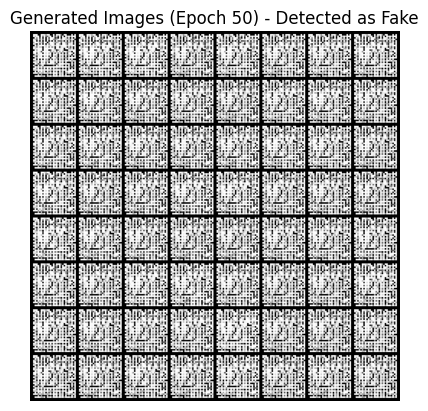

Epoch [51/300], Batch [1/235], Discriminator Loss: 0.0000, Generator Loss: 45.7832, Discriminator Accuracy: 100.00%
Epoch [51/300], Batch [101/235], Discriminator Loss: 0.0000, Generator Loss: 45.7823, Discriminator Accuracy: 100.00%


In [ ]:
# step 6 :define training loop, but we have added accuracy of discriminator
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# Define a function to calculate the discriminator accuracy
def calculate_accuracy(real_images, fake_images, discriminator):
    batch_size = real_images.shape[0]

    # Create labels for real and fake images
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    # Pass real and fake images through the discriminator
    real_output = discriminator(real_images)
    fake_output = discriminator(fake_images.detach())

    # Calculate the accuracy
    accuracy = ((real_output >= 0.5).sum() + (fake_output < 0.5).sum()).item() / (2 * batch_size)

    return accuracy

# Train the models
num_epochs = 50
display_interval = 5

# Create a fixed noise vector for generating samples
fixed_noise = torch.randn(64, 100)

for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.shape[0]

        # Train the discriminator
        discriminator.zero_grad()
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train on real images
        real_output = discriminator(real_images)
        real_loss = criterion(real_output, real_labels)

        # Train on fake images
        noise = torch.randn(batch_size, 100)
        fake_images = generator(noise)
        fake_output = discriminator(fake_images.detach())
        fake_loss = criterion(fake_output, fake_labels)

        # Total loss
        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # Train the generator
        generator.zero_grad()
        noise = torch.randn(batch_size, 100)
        fake_images = generator(noise)
        fake_output = discriminator(fake_images)
        generator_loss = criterion(fake_output, real_labels)
        generator_loss.backward()
        generator_optimizer.step()

        if batch_idx % 100 == 0:
            # Calculate the discriminator accuracy
            accuracy = calculate_accuracy(real_images, fake_images, discriminator)

            print('Epoch [{}/{}], Batch [{}/{}], Discriminator Loss: {:.4f}, Generator Loss: {:.4f}, Discriminator Accuracy: {:.2f}%'
                  .format(epoch+1, num_epochs, batch_idx+1, len(train_loader), discriminator_loss.item(), generator_loss.item(), accuracy * 100))

    if (epoch + 1) % display_interval == 0:
        # Generate new images and save them
        with torch.no_grad():
            fake = generator(fixed_noise).detach().cpu()
            output = discriminator(fake).detach().cpu()
        fake = vutils.make_grid(fake, padding=2, normalize=True)
        fake = np.transpose(fake, (1, 2, 0))
        plt.imshow(fake)
        plt.axis("off")
        plt.title("Generated Images (Epoch {}) - Detected as {}".format(epoch+1, "Real" if output.mean() >= 0.5 else "Fake"))
        plt.show()
